In [16]:
from typing import Tuple
import torch
def gd_factorise_ad(A: torch.Tensor, rank:int, num_epochs=1000, lr=0.01) -> Tuple[torch.Tensor, torch.Tensor]:
    m,n = A.size()
    r = rank
    U = torch.randn((m,r))
    V = torch.randn((n,r))
    U = U.double()
    V = V.double()
    U = U.clone().detach().requires_grad_(True)
    V = V.clone().detach().requires_grad_(True)
    for epoch in range(num_epochs):
        Error = torch.nn.functional.mse_loss(U@V.t(),A,reduction ='sum')
        Error.backward()
        U.data -= lr*U.grad
        V.data -= lr*V.grad
        U.grad.zero_()
        V.grad.zero_()
        if epoch%10==0:
            print("Epoch:",epoch,"Error:",Error)
    return U, V 

In [14]:
from typing import Tuple
import torch
def gd_factorise_ad(A: torch.Tensor, rank:int, num_epochs=1000, lr=0.01) -> Tuple[torch.Tensor, torch.Tensor]:
    m,n = A.size()
    r = rank
    U = torch.randn((m,r))
    V = torch.randn((n,r))
    U = U.double()
    V = V.double()
    U = U.clone().detach().requires_grad_(True)
    V = V.clone().detach().requires_grad_(True)
    for epoch in range(num_epochs):
        Error = torch.nn.functional.mse_loss(U@V.t(),A,reduction ='sum')
        Error.backward()
        with torch.no_grad():
            U.data -= lr*U.grad
            V.data -= lr*V.grad
        U.grad.zero_()
        V.grad.zero_()
        if epoch%10==0:
            print("Epoch:",epoch,"Error:",Error)
    return U, V 

In [17]:
import pandas as pd
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases'+'/iris/iris.data',header=None)
data = torch.tensor(df.iloc[:,[0,1,2,3]].values)
data = data - data.mean(dim=0)
print(data.size())
U_,V_ = gd_factorise_ad(data,2)
print(V_.size())
print("Rank 2:",torch.nn.functional.mse_loss(U_@V_.t(),data,reduction='sum'))
# U__,V__ = gd_factorise_ad(data,4)
# print("Rank 4:",torch.nn.functional.mse_loss(U__@V__.t(),data,reduction='sum'))

torch.Size([150, 4])
Epoch: 0 Error: tensor(1988.9996, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Epoch: 10 Error: tensor(54.0795, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Epoch: 20 Error: tensor(46.7408, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Epoch: 30 Error: tensor(40.0153, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Epoch: 40 Error: tensor(27.5734, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Epoch: 50 Error: tensor(18.6725, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Epoch: 60 Error: tensor(16.0085, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Epoch: 70 Error: tensor(15.4058, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Epoch: 80 Error: tensor(15.2714, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Epoch: 90 Error: tensor(15.2399, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Epoch: 100 Error: tensor(15.2320, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Epoch: 110 Error: tensor(15.2298, dtype=torch.float64, grad_fn=<MseLossBack

In [11]:
import torch
from scipy.linalg import sqrtm

U,S,V_T = torch.svd(data)
print(U.size())
print("S:",S)
S[-1] = 0
SS_ = torch.diag(S)
# U_ = U@sqrtm(SS_)
# V_T_ = V_T@sqrtm(SS_)
# data_ = U_@V_T_.t()
data_ = U@SS_@V_T.t()
# print("U_:",U)
# print("V_T_:",V_T_)
# print("data*:",data_)
# print("data:",data)
print("Error:",torch.nn.functional.mse_loss(data_,data,reduction ='sum'))

torch.Size([150, 4])
S: tensor([25.0899,  6.0079,  3.4205,  1.8785], dtype=torch.float64)
Error: tensor(3.5288, dtype=torch.float64)


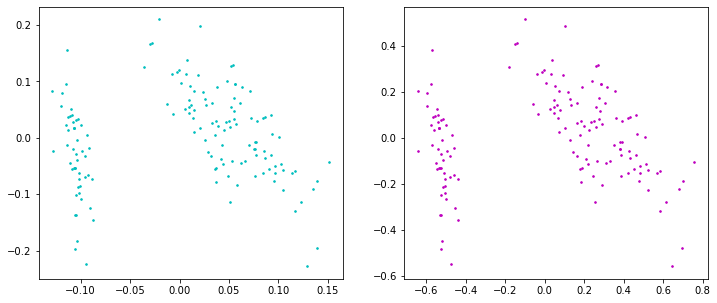

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize=(12,5))
ax[0].scatter(U[:,0], U[:,1], c="c", s=2.5)
ax[1].scatter(U_[:,0], U_[:,1], c="m", s=2.5)
# ax.set_xlim(-6, 6)
# ax.set_ylim(-6, 6)
plt.savefig("Compare against PCA.png")

In [11]:
import torch
import pandas as pd
torch.set_default_tensor_type(torch.DoubleTensor)
df0 = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases'+'/iris/iris.data',header=None)
df = df0.sample(frac = 1) #shuffle
# print(df0)
# print(df)

#add label indices column
mapping = {k: v for v, k in enumerate(df[4].unique())}
df[5] = df[4].map(mapping)
# print(df)

#normalisation
alldata = torch.tensor(df.iloc[:,[0,1,2,3]].values, dtype=torch.float)
alldata = (alldata - alldata.mean(dim=0))/alldata.var(dim=0)

#create datasets
targets_train = torch.tensor(df.iloc[:100,5].values, dtype=torch.long)
targets_valid = torch.tensor(df.iloc[100:,5].values, dtype=torch.long)
data_train = alldata[:100]
data_valid = alldata[100:]
# print(data_train.size())
# print(type(data_train))
# print(data_valid.size())

torch.Size([100, 4])
torch.Size([50, 4])


In [8]:
#MLP
import numpy as np
from sklearn.metrics import accuracy_score
def MLP(Data,Target,num_epochs = 100,lr = 0.01):
    W1 = torch.randn(4,12)
    W2 = torch.randn(12,3)
    W1 = W1.float()
    W2 = W2.float()
    W1 = W1.clone().detach().requires_grad_(True)
    W2 = W2.clone().detach().requires_grad_(True)
    b1 = torch.tensor(0.0,requires_grad=True)
    b2 = torch.tensor(0.0,requires_grad=True)
    for epoch in range(num_epochs):
        logits = torch.relu(Data @ W1 + b1)@ W2 + b2
        Error = torch.nn.functional.cross_entropy(logits,Target)
        Error.backward()
        W1.data -= lr*W1.grad
        W2.data -= lr*W2.grad
        b1.data -= lr*b1.grad
        b2.data -= lr*b2.grad
#         if epoch%10==0 :
#             print("Epoch:",epoch,"Error:",Error)
    W1e = W1.data
    W2e = W2.data
    b1e = b1.data
    b2e = b2.data
    output  = torch.relu(Data @ W1e + b1e)@ W2e + b2e
#     print(output)
#     print(output.size())
    pred = output.argmax(dim=1)
#     print(pred)
#     print(Target)
    Accuracy = accuracy_score(pred, Target)
#     print(Accuracy)
#     return Accuracy,Error
    return Accuracy,Error

In [20]:
Accuracy1,Error1 = MLP(data_train,targets_train)
Accuracy2,Error2 = MLP(data_valid,targets_valid)


print("Accuracy_Train:",Accuracy1)
print("Error_Train:",Error1)
print("Accuracy_Valid:",Accuracy2)
print("Error_Valid:",Error2)

Accuracy_Train: 0.88
Error_Train: tensor(1.2817, dtype=torch.float32, grad_fn=<NllLossBackward0>)
Accuracy_Valid: 0.9
Error_Valid: tensor(0.3157, dtype=torch.float32, grad_fn=<NllLossBackward0>)
